In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("datasets_228_482_diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
import torch
import torch.nn as nn 
import torch.nn.functional as F

In [10]:
## Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [11]:
## create model with pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,output_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)   
        self.out=nn.Linear(hidden2,output_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [12]:
## Instantiate the ANN_Model
torch.manual_seed(20)
model=ANN_Model()

In [13]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [16]:
## backward propagation
loss_function = nn.CrossEntropyLoss()

In [17]:
## optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [20]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if 1%10==1:
        print("Epoch number:  {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number:  1 and the loss : 3.457212209701538
Epoch number:  2 and the loss : 1.7547036409378052
Epoch number:  3 and the loss : 1.4100372791290283
Epoch number:  4 and the loss : 0.9451971650123596
Epoch number:  5 and the loss : 1.1574180126190186
Epoch number:  6 and the loss : 0.8915755152702332
Epoch number:  7 and the loss : 0.7283689975738525
Epoch number:  8 and the loss : 0.8199499845504761
Epoch number:  9 and the loss : 0.6772931814193726
Epoch number:  10 and the loss : 0.6956121921539307
Epoch number:  11 and the loss : 0.8019212484359741
Epoch number:  12 and the loss : 0.7153996229171753
Epoch number:  13 and the loss : 0.6444704532623291
Epoch number:  14 and the loss : 0.6793992519378662
Epoch number:  15 and the loss : 0.6693853139877319
Epoch number:  16 and the loss : 0.6191177368164062
Epoch number:  17 and the loss : 0.6354078650474548
Epoch number:  18 and the loss : 0.6668112277984619
Epoch number:  19 and the loss : 0.6471998691558838
Epoch number:  20 and 

Epoch number:  157 and the loss : 0.4874245226383209
Epoch number:  158 and the loss : 0.5034086108207703
Epoch number:  159 and the loss : 0.4796396493911743
Epoch number:  160 and the loss : 0.5076741576194763
Epoch number:  161 and the loss : 0.479302316904068
Epoch number:  162 and the loss : 0.48267412185668945
Epoch number:  163 and the loss : 0.5006633996963501
Epoch number:  164 and the loss : 0.47311052680015564
Epoch number:  165 and the loss : 0.48866236209869385
Epoch number:  166 and the loss : 0.47210463881492615
Epoch number:  167 and the loss : 0.481431782245636
Epoch number:  168 and the loss : 0.46870899200439453
Epoch number:  169 and the loss : 0.47235924005508423
Epoch number:  170 and the loss : 0.47330546379089355
Epoch number:  171 and the loss : 0.4650035500526428
Epoch number:  172 and the loss : 0.47160622477531433
Epoch number:  173 and the loss : 0.46218252182006836
Epoch number:  174 and the loss : 0.47070083022117615
Epoch number:  175 and the loss : 0.46

Epoch number:  310 and the loss : 0.41752541065216064
Epoch number:  311 and the loss : 0.41391947865486145
Epoch number:  312 and the loss : 0.40688556432724
Epoch number:  313 and the loss : 0.4119664430618286
Epoch number:  314 and the loss : 0.4064942002296448
Epoch number:  315 and the loss : 0.4037376642227173
Epoch number:  316 and the loss : 0.40626707673072815
Epoch number:  317 and the loss : 0.4038506746292114
Epoch number:  318 and the loss : 0.40256762504577637
Epoch number:  319 and the loss : 0.4023597538471222
Epoch number:  320 and the loss : 0.4004814624786377
Epoch number:  321 and the loss : 0.40018486976623535
Epoch number:  322 and the loss : 0.3994886875152588
Epoch number:  323 and the loss : 0.397845596075058
Epoch number:  324 and the loss : 0.3978191614151001
Epoch number:  325 and the loss : 0.39706099033355713
Epoch number:  326 and the loss : 0.3965420722961426
Epoch number:  327 and the loss : 0.39716973900794983
Epoch number:  328 and the loss : 0.398124

Epoch number:  463 and the loss : 0.3609304130077362
Epoch number:  464 and the loss : 0.3652142584323883
Epoch number:  465 and the loss : 0.37734338641166687
Epoch number:  466 and the loss : 0.40137505531311035
Epoch number:  467 and the loss : 0.4392721951007843
Epoch number:  468 and the loss : 0.46677365899086
Epoch number:  469 and the loss : 0.43502187728881836
Epoch number:  470 and the loss : 0.3703891336917877
Epoch number:  471 and the loss : 0.36999544501304626
Epoch number:  472 and the loss : 0.41694730520248413
Epoch number:  473 and the loss : 0.45687299966812134
Epoch number:  474 and the loss : 0.4189334809780121
Epoch number:  475 and the loss : 0.3641641139984131
Epoch number:  476 and the loss : 0.41298145055770874
Epoch number:  477 and the loss : 0.4528067409992218
Epoch number:  478 and the loss : 0.41265150904655457
Epoch number:  479 and the loss : 0.37390968203544617
Epoch number:  480 and the loss : 0.39839163422584534
Epoch number:  481 and the loss : 0.40

In [21]:
## plot the loss function
import matplotlib.pyplot as plt 
%matplotlib inline

Text(0.5, 0, 'Epoch')

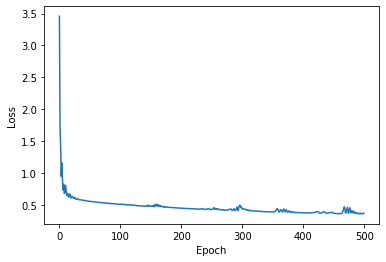

In [22]:
plt.plot(range(epochs),final_losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [23]:
## prediction in the x_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [17, 30]], dtype=int64)

Text(69.0, 0.5, 'Predicted values')

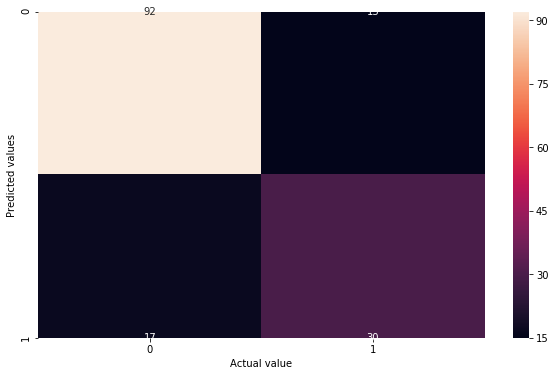

In [28]:
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual value")
plt.ylabel("Predicted values")

In [29]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

In [31]:
## save the model
torch.save(model,"diabetes.pt")

In [32]:
## load the model
model=torch.load("diabetes.pt")

In [33]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [34]:
## prediction of new data
list = [6.0, 130.0, 73.0, 48.0, 0.0, 35.6, 0.627, 45.0]

In [35]:
new_data = torch.tensor(list)

In [37]:
## predict new data using pytorch 
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.1727, 1.3417])
1
